<a href="https://colab.research.google.com/github/Seghelicious/Stuber-Logistics/blob/main/stuber_logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Manipulation libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date, time

# Visualisation libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib import style
plt.style.use('ggplot')
import itertools
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Model Development libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation libraries
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data and Decisioning Job Take Home Challenge/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data and Decisioning Job Take Home Challenge/test.csv')
train.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_7277,Motorcycle,P3,Commercial,27,1,9:18:22 AM,27,1,9:18:42 AM,27,1,9:46:23 AM,27,1,9:48:02 AM,27,1,10:11:30 AM,6,20.90,1.00,-1.29,36.81,-1.30,36.77,23.47
1,UserLogger_1281,Motorcycle,P3,Commercial,25,1,12:07:04 PM,25,1,12:08:36 PM,25,1,12:41:16 PM,25,1,12:45:15 PM,25,1,1:02:09 PM,9,29.90,nan,-1.23,36.84,-1.25,36.87,16.90
2,UserLogger_2566,Motorcycle,P3,Commercial,12,6,1:20:11 PM,12,6,1:34:44 PM,12,6,1:54:51 PM,12,6,1:58:20 PM,12,6,2:20:10 PM,9,28.50,nan,-1.32,36.85,-1.27,36.82,21.83
3,UserLogger_11805,Motorcycle,P3,Commercial,28,4,11:13:53 AM,28,4,11:14:07 AM,28,4,11:25:32 AM,28,4,11:53:20 AM,28,4,11:53:23 AM,9,26.80,nan,-1.26,36.79,-1.30,36.83,0.05
4,UserLogger_15199,Motorcycle,P3,Commercial,12,2,1:41:02 PM,12,2,1:41:57 PM,12,2,2:40:49 PM,12,2,2:45:15 PM,12,2,3:12:49 PM,7,30.10,nan,-1.26,36.78,-1.29,36.79,27.57


In [4]:
test.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,4,1,3:22:48 PM,4,1,3:26:38 PM,4,1,4:01:26 PM,13,nan,nan,-1.26,36.78,-1.32,36.83
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,13,5,3:47:03 PM,13,5,3:52:54 PM,13,5,4:21:44 PM,13,22.10,nan,-1.24,36.77,-1.29,36.76
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,11,1,10:18:23 AM,11,1,10:54:39 AM,11,1,10:55:02 AM,11,29.60,nan,-1.32,36.83,-1.26,36.79
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,5,2,5:07:38 PM,5,2,5:16:02 PM,5,2,6:12:00 PM,21,28.20,nan,-1.29,36.90,-1.30,36.76
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,11,5,3:57:14 PM,11,5,4:11:56 PM,11,5,4:27:57 PM,11,25.40,nan,-1.33,36.85,-1.29,36.90


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14840 entries, 0 to 14839
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   User_ID                                      14840 non-null  object 
 1   Tranport_Vehicle                             14840 non-null  object 
 2   Platform                                     14840 non-null  object 
 3   Purpose                                      14840 non-null  object 
 4   Order_Day_of_Month                           14840 non-null  int64  
 5   Order_Week_of_Month                          14840 non-null  int64  
 6   Time_of_Order                                14840 non-null  object 
 7   Order_Confirm_Day_of_Month                   14840 non-null  int64  
 8   Order_Confirm_Day_of_Weekday                 14840 non-null  int64  
 9   Time_of_Confirmation                         14840 non-null  object 
 10

Only the Precipitation and Temperation columns have missing values in both the train and test datasets

In [6]:
train.isna().sum()

User_ID                                            0
Tranport_Vehicle                                   0
Platform                                           0
Purpose                                            0
Order_Day_of_Month                                 0
Order_Week_of_Month                                0
Time_of_Order                                      0
Order_Confirm_Day_of_Month                         0
Order_Confirm_Day_of_Weekday                       0
Time_of_Confirmation                               0
Arrival_At_Pickup_MonthDay                         0
Arrival_At_Pickup_Weekday                          0
Arrival_at_Pickup_Time                             0
Pickup_MonthDay                                    0
Pickup_WeekDay                                     0
Pickup_Time                                        0
Delivery_MonthDay                                  0
Delivery_Weekday                                   0
Delivery_Time                                 

In [7]:
test.isna().sum()

User_ID                            0
Tranport_Vehicle                   0
Platform                           0
Purpose                            0
Order_Day_of_Month                 0
Order_Week_of_Month                0
Time_of_Order                      0
Order_Confirm_Day_of_Month         0
Order_Confirm_Day_of_Weekday       0
Time_of_Confirmation               0
Arrival_At_Pickup_MonthDay         0
Arrival_At_Pickup_Weekday          0
Arrival_at_Pickup_Time             0
Pickup_MonthDay                    0
Pickup_WeekDay                     0
Pickup_Time                        0
Delivery_MonthDay                  0
Delivery_Weekday                   0
Delivery_Time                      0
DistanceCovered_KM                 0
Temperation                     1294
Precipitation_in_millimeters    6201
Latitude_Pickup                    0
Longitude_Pickup                   0
Latitude_Destination               0
Longitude_Destination              0
dtype: int64

# Feature Engineering

Convert time-based variables from 12hr clock to 24hr clock

In [8]:
def convert24(col):
  col = pd.to_datetime(col)
  col = col.dt.strftime('%H:%M:%S')
  col = pd.to_datetime(col, format = '%H:%M:%S')
  return col

In [9]:
train['Arrival_at_Pickup_Time'] = convert24(train['Arrival_at_Pickup_Time'])
train['Time_of_Order'] = convert24(train['Time_of_Order'])
train['Time_of_Confirmation'] = convert24(train['Time_of_Confirmation'])
train['Pickup_Time'] = convert24(train['Pickup_Time'])
train['Delivery_Time'] = convert24(train['Delivery_Time'])

test['Arrival_at_Pickup_Time'] = convert24(test['Arrival_at_Pickup_Time'])
test['Time_of_Order'] = convert24(test['Time_of_Order'])
test['Time_of_Confirmation'] = convert24(test['Time_of_Confirmation'])
test['Pickup_Time'] = convert24(test['Pickup_Time'])
test['Delivery_Time'] = convert24(test['Delivery_Time'])

In [10]:
test.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,1900-01-01 15:08:18,4,1,1900-01-01 15:10:19,4,1,1900-01-01 15:22:48,4,1,1900-01-01 15:26:38,4,1,1900-01-01 16:01:26,13,nan,nan,-1.26,36.78,-1.32,36.83
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,1900-01-01 15:34:11,13,5,1900-01-01 15:35:44,13,5,1900-01-01 15:47:03,13,5,1900-01-01 15:52:54,13,5,1900-01-01 16:21:44,13,22.10,nan,-1.24,36.77,-1.29,36.76
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,1900-01-01 10:18:09,11,1,1900-01-01 10:18:18,11,1,1900-01-01 10:18:23,11,1,1900-01-01 10:54:39,11,1,1900-01-01 10:55:02,11,29.60,nan,-1.32,36.83,-1.26,36.79
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,1900-01-01 16:45:37,5,2,1900-01-01 16:48:44,5,2,1900-01-01 17:07:38,5,2,1900-01-01 17:16:02,5,2,1900-01-01 18:12:00,21,28.20,nan,-1.29,36.90,-1.30,36.76
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,1900-01-01 15:56:56,11,5,1900-01-01 15:57:09,11,5,1900-01-01 15:57:14,11,5,1900-01-01 16:11:56,11,5,1900-01-01 16:27:57,11,25.40,nan,-1.33,36.85,-1.29,36.90


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   User_ID                       6361 non-null   object        
 1   Tranport_Vehicle              6361 non-null   object        
 2   Platform                      6361 non-null   object        
 3   Purpose                       6361 non-null   object        
 4   Order_Day_of_Month            6361 non-null   int64         
 5   Order_Week_of_Month           6361 non-null   int64         
 6   Time_of_Order                 6361 non-null   datetime64[ns]
 7   Order_Confirm_Day_of_Month    6361 non-null   int64         
 8   Order_Confirm_Day_of_Weekday  6361 non-null   int64         
 9   Time_of_Confirmation          6361 non-null   datetime64[ns]
 10  Arrival_At_Pickup_MonthDay    6361 non-null   int64         
 11  Arrival_At_Pickup_Weekday     

In [12]:
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = test['Delivery_Time'] - test['Pickup_Time']

Extract the time component from the datetime object on both test and train datasets

In [13]:
# Train
train['Time_of_Order'] = pd.to_datetime(train['Time_of_Order']).dt.time
train['Time_of_Confirmation'] = pd.to_datetime(train['Time_of_Confirmation']).dt.time
train['Arrival_at_Pickup_Time'] = pd.to_datetime(train['Arrival_at_Pickup_Time']).dt.time
train['Pickup_Time'] = pd.to_datetime(train['Pickup_Time']).dt.time
train['Delivery_Time'] = pd.to_datetime(train['Delivery_Time']).dt.time

# Test
test['Time_of_Order'] = pd.to_datetime(test['Time_of_Order']).dt.time
test['Time_of_Confirmation'] = pd.to_datetime(test['Time_of_Confirmation']).dt.time
test['Arrival_at_Pickup_Time'] = pd.to_datetime(test['Arrival_at_Pickup_Time']).dt.time
test['Pickup_Time'] = pd.to_datetime(test['Pickup_Time']).dt.time
test['Delivery_Time'] = pd.to_datetime(test['Delivery_Time']).dt.time

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   User_ID                                      6361 non-null   object         
 1   Tranport_Vehicle                             6361 non-null   object         
 2   Platform                                     6361 non-null   object         
 3   Purpose                                      6361 non-null   object         
 4   Order_Day_of_Month                           6361 non-null   int64          
 5   Order_Week_of_Month                          6361 non-null   int64          
 6   Time_of_Order                                6361 non-null   object         
 7   Order_Confirm_Day_of_Month                   6361 non-null   int64          
 8   Order_Confirm_Day_of_Weekday                 6361 non-null   int64  

Convert the target column to datetime[ns] format

In [15]:
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'].values.astype('datetime64[ns]')

Extract the time component of the datetime data

In [16]:
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'].dt.time

Convert the time data to '%M.%S' float format. 

In [17]:
test[['h','m','s']] = test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'].astype(str).str.split(':', expand=True).astype(int)
test['hm'] = test['h'] * 60 + test['m']
test['hm'] = test['hm'].astype('str')
test['s'] = test['s'].astype('str')
str_time = test['hm'] + '.' + test['s']
str_time = str_time.astype('float64')
test['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = str_time
test = test.drop(columns = ['h', 'm', 's', 'hm', ], axis = 1)

In [18]:
# Time_of_Order
test[['h', 'm', 's']] = test['Time_of_Order'].astype(str).str.split(':', expand = True).astype(int)
test[['hm']] = test['h'] * 60 + test['m']
test['hm'] = test['hm'].astype('str')
test['s'] = test['s'].astype('str')
str_time1 = test['hm'] + '.' + test['s']
str_time1 = str_time1.astype('float64')
test['Time_of_Order'] = str_time1
test = test.drop(columns = ['h', 'm', 's', 'hm'])

# Time_of_Confirmation
test[['h2', 'm2', 's2']] = test['Time_of_Confirmation'].astype(str).str.split(':', expand = True).astype(int)
test[['hm2']] = test['h2'] * 60 + test['m2']
test['hm2'] = test['hm2'].astype('str')
test['s2'] = test['s2'].astype('str')
str_time2 = test['hm2'] + '.' + test['s2']
str_time2 = str_time2.astype('float64')
test['Time_of_Confirmation'] = str_time2
test = test.drop(columns = ['h2', 'm2', 's2', 'hm2'])

# Arrival_at_Pickup_Time
test[['h3', 'm3', 's3']] = test['Arrival_at_Pickup_Time'].astype(str).str.split(':', expand = True).astype(int)
test[['hm3']] = test['h3'] * 60 + test['m3']
test['hm3'] = test['hm3'].astype('str')
test['s3'] = test['s3'].astype('str')
str_time3 = test['hm3'] + '.' + test['s3']
str_time3 = str_time3.astype('float64')
test['Arrival_at_Pickup_Time'] = str_time3
test = test.drop(columns = ['h3', 'm3', 's3', 'hm3'])

# Pickup_Time
test[['h4', 'm4', 's4']] = test['Pickup_Time'].astype(str).str.split(':', expand = True).astype(int)
test[['hm4']] = test['h4'] * 60 + test['m4']
test['hm4'] = test['hm4'].astype('str')
test['s4'] = test['s4'].astype('str')
str_time4 = test['hm4'] + '.' + test['s4']
str_time4 = str_time4.astype('float64')
test['Pickup_Time'] = str_time4
test = test.drop(columns = ['h4', 'm4', 's4', 'hm4'])

# Delivery_Time
test[['h5', 'm5', 's5']] = test['Delivery_Time'].astype(str).str.split(':', expand = True).astype(int)
test[['hm5']] = test['h5'] * 60 + test['m5']
test['hm5'] = test['hm5'].astype('str')
test['s5'] = test['s5'].astype('str')
str_time5 = test['hm5'] + '.' + test['s5']
str_time5 = str_time5.astype('float64')
test['Delivery_Time'] = str_time5
test = test.drop(columns = ['h5', 'm5', 's5', 'hm5'])

In [19]:
# Time_of_Order
train[['h', 'm', 's']] = train['Time_of_Order'].astype(str).str.split(':', expand = True).astype(int)
train[['hm']] = train['h'] * 60 + train['m']
train['hm'] = train['hm'].astype('str')
train['s'] = train['s'].astype('str')
str_time1 = train['hm'] + '.' + train['s']
str_time1 = str_time1.astype('float64')
train['Time_of_Order'] = str_time1
train = train.drop(columns = ['h', 'm', 's', 'hm'])

# Time_of_Confirmation
train[['h2', 'm2', 's2']] = train['Time_of_Confirmation'].astype(str).str.split(':', expand = True).astype(int)
train[['hm2']] = train['h2'] * 60 + train['m2']
train['hm2'] = train['hm2'].astype('str')
train['s2'] = train['s2'].astype('str')
str_time2 = train['hm2'] + '.' + train['s2']
str_time2 = str_time2.astype('float64')
train['Time_of_Confirmation'] = str_time2
train = train.drop(columns = ['h2', 'm2', 's2', 'hm2'])

# Arrival_at_Pickup_Time
train[['h3', 'm3', 's3']] = train['Arrival_at_Pickup_Time'].astype(str).str.split(':', expand = True).astype(int)
train[['hm3']] = train['h3'] * 60 + train['m3']
train['hm3'] = train['hm3'].astype('str')
train['s3'] = train['s3'].astype('str')
str_time3 = train['hm3'] + '.' + train['s3']
str_time3 = str_time3.astype('float64')
train['Arrival_at_Pickup_Time'] = str_time3
train = train.drop(columns = ['h3', 'm3', 's3', 'hm3'])

# Pickup_Time
train[['h4', 'm4', 's4']] = train['Pickup_Time'].astype(str).str.split(':', expand = True).astype(int)
train[['hm4']] = train['h4'] * 60 + train['m4']
train['hm4'] = train['hm4'].astype('str')
train['s4'] = train['s4'].astype('str')
str_time4 = train['hm4'] + '.' + train['s4']
str_time4 = str_time4.astype('float64')
train['Pickup_Time'] = str_time4
train = train.drop(columns = ['h4', 'm4', 's4', 'hm4'])

# Delivery_Time
train[['h5', 'm5', 's5']] = train['Delivery_Time'].astype(str).str.split(':', expand = True).astype(int)
train[['hm5']] = train['h5'] * 60 + train['m5']
train['hm5'] = train['hm5'].astype('str')
train['s5'] = train['s5'].astype('str')
str_time5 = train['hm5'] + '.' + train['s5']
str_time5 = str_time5.astype('float64')
train['Delivery_Time'] = str_time5
train = train.drop(columns = ['h5', 'm5', 's5', 'hm5'])

Concatenate the test and train data for easier feature selection. Drop the User ID column

In [20]:
biker_data = pd.concat([train, test], axis = 0)
biker_data1 = biker_data.drop(columns = ['User_ID'], axis = 1)

Label encode the categorical columns - Tranport_Vehicle, PLatform and Purpose

In [21]:
le = preprocessing.LabelEncoder()
biker_data1['Tranport_Vehicle'] = le.fit_transform(biker_data1['Tranport_Vehicle'])
biker_data1['Platform'] = le.fit_transform(biker_data1['Platform'])
biker_data1['Purpose'] = le.fit_transform(biker_data1['Purpose'])

The Precipitation and Temperation columns are the only columns with missing values in the dataset. 

I have made the assumption that the missing values (NaN) in the Precipitation_in_millimeters column are the days where there was no form of rain or drizzle so I shall replace the NaN values with zero to reflect that. 

I have also made a similar assumption for the Temperation column. The missing values are cold days when the temperature was at zero degrees. I shall also replace the Nan values with zero.

In [22]:
biker_data1['Precipitation_in_millimeters'] = biker_data1['Precipitation_in_millimeters'].replace(np.nan, 0.0)
biker_data1['Temperation'] = biker_data1['Temperation'].replace(np.nan, 0.0)
biker_data1.head()

,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Arrival_at_Pickup_Time,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,0,2,0,27,1,558.22,27,1,558.42,27,1,586.23,27,1,588.20,27,1,611.30,6,20.90,1.00,-1.29,36.81,-1.30,36.77,23.47
1,0,2,0,25,1,727.40,25,1,728.36,25,1,761.16,25,1,765.15,25,1,782.90,9,29.90,0.00,-1.23,36.84,-1.25,36.87,16.90
2,0,2,0,12,6,800.11,12,6,814.44,12,6,834.51,12,6,838.20,12,6,860.10,9,28.50,0.00,-1.32,36.85,-1.27,36.82,21.83
3,0,2,0,28,4,673.53,28,4,674.70,28,4,685.32,28,4,713.20,28,4,713.23,9,26.80,0.00,-1.26,36.79,-1.30,36.83,0.05
4,0,2,0,12,2,821.20,12,2,821.57,12,2,880.49,12,2,885.15,12,2,912.49,7,30.10,0.00,-1.26,36.78,-1.29,36.79,27.57


# Feature Selection

I shall use the Pearson Correlation coefficient to select the most relevant features

In [23]:
biker_corr = biker_data1.copy()

In [24]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(biker_corr)
biker_df = pd.DataFrame(data = scaled, columns = biker_corr.columns)

In [25]:
def correlation(df, threshold):
  corr_col = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        corr_col.add(colname)
  return corr_col

The correlation threshold value has been set at 70% or 0.7. The columns with a correlation coefficient equal to or greater than the threshold value shall be dropped.

In [26]:
corr_features = correlation(biker_df, 0.7)
corr_features

{'Arrival_At_Pickup_MonthDay',
 'Arrival_At_Pickup_Weekday',
 'Arrival_at_Pickup_Time',
 'Delivery_MonthDay',
 'Delivery_Time',
 'Delivery_Weekday',
 'Order_Confirm_Day_of_Month',
 'Order_Confirm_Day_of_Weekday',
 'Pickup_MonthDay',
 'Pickup_Time',
 'Pickup_WeekDay',
 'Purpose',
 'Time_of_Confirmation'}

In [27]:
biker_data1 = biker_data1.drop(corr_features, axis = 1)

Scale data for feature selection with Pearson Correlation Coefficient

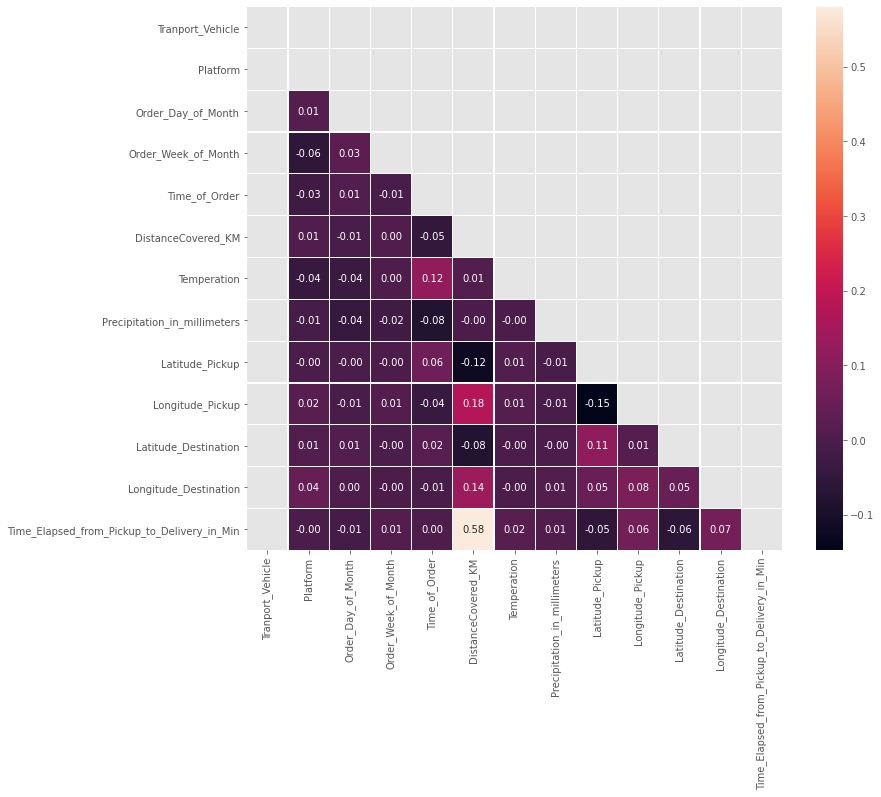

In [28]:
corr = np.triu(biker_data1.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(biker_data1.corr(), annot = True, linewidths = 0.2, fmt = '.2f', mask = corr)

# Model Development

The Tranport_Vehicle column shall be dropped because it does not have a lot of variability.

In [29]:
biker_data1 = biker_data1.drop(columns = ['Tranport_Vehicle'], axis = 1)

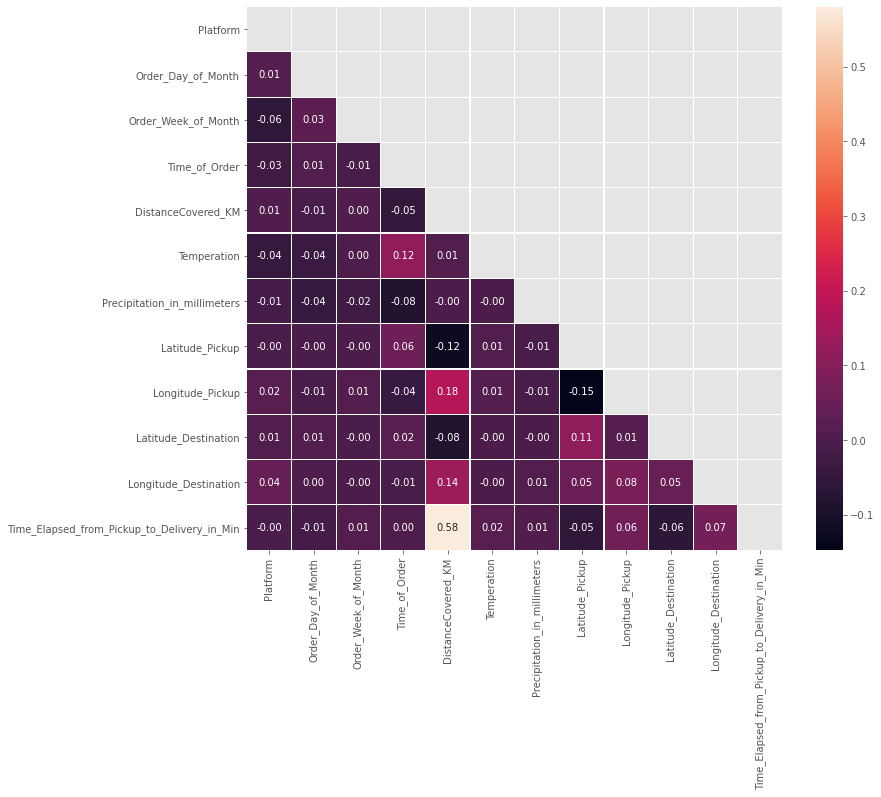

In [30]:
corr = np.triu(biker_data1.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(biker_data1.corr(), annot = True, linewidths = 0.2, fmt = '.2f', mask = corr)

### Train - Test Split

Seperate into train and test datasets. Split train dataset into train and validation columns. Log-normalise the target columns

In [31]:
target = biker_data['Time_Elapsed_from_Pickup_to_Delivery_in_Min'].copy()

target1 = target.iloc[0:14839]
target2 = target.iloc[14840:]

train = biker_data1.iloc[0:14839]
test = biker_data1.iloc[14840:]

target1 = np.log(target1).values
target2 = np.log(target2).values
train = train.drop(columns = ['Time_Elapsed_from_Pickup_to_Delivery_in_Min'], axis = 1).values

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(train, target1, test_size = 0.4, random_state = 10)

Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I shall implement standardisation using pipelines and then use cross-validation to validate performance of all the algorithms.

In [32]:
pipelines = []
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 3, random_state = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    notification = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(notification)

ScaledRF: -1.242953 (0.059720)
ScaledGB: -1.154152 (0.070336)


From the output above, it looks like the Random Forest Regressor performs the best using a scaled version of the data. As it has a mean value (-1.247892) closer to zero From this point onward, the regression algorithm shall be using the Random Forest Regressor.

In [33]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
param_grid = {'max_depth': np.array([5, 10, 15, 20, 25]), 
              'n_estimators': np.array([200, 200, 600, 800, 1000])}
model = RandomForestRegressor(random_state = 10)
kfold = KFold(n_splits = 3, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = kfold)
grid_result = grid.fit(X_train_scaled, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

-1.160887 (0.072416) with: {'max_depth': 5, 'n_estimators': 200}
-1.160887 (0.072416) with: {'max_depth': 5, 'n_estimators': 200}
-1.160263 (0.072632) with: {'max_depth': 5, 'n_estimators': 600}
-1.159841 (0.072383) with: {'max_depth': 5, 'n_estimators': 800}
-1.159773 (0.072278) with: {'max_depth': 5, 'n_estimators': 1000}
-1.203018 (0.057698) with: {'max_depth': 10, 'n_estimators': 200}
-1.203018 (0.057698) with: {'max_depth': 10, 'n_estimators': 200}
-1.202580 (0.058900) with: {'max_depth': 10, 'n_estimators': 600}
-1.203553 (0.058391) with: {'max_depth': 10, 'n_estimators': 800}
-1.203051 (0.057875) with: {'max_depth': 10, 'n_estimators': 1000}
-1.232190 (0.054132) with: {'max_depth': 15, 'n_estimators': 200}
-1.232190 (0.054132) with: {'max_depth': 15, 'n_estimators': 200}
-1.230676 (0.055496) with: {'max_depth': 15, 'n_estimators': 600}
-1.231590 (0.055712) with: {'max_depth': 15, 'n_estimators': 800}
-1.231133 (0.054952) with: {'max_depth': 15, 'n_estimators': 1000}
-1.238999 (0

The best max_depth configuration is 5, along with a n_estimators configuration of 1000 give a negative mean square error closest to 0.

### Validate model

In [34]:
model = RandomForestRegressor(random_state = 10, max_depth = 5, n_estimators = 1000)
model.fit(X_train_scaled, Y_train)

X_test_rescaled = scaler.transform(X_test)
predictions = model.predict(X_test_rescaled)
mse = mean_squared_error(Y_test, predictions, squared = True)
rmse = mean_squared_error(Y_test, predictions, squared = False)
mse, rmse

(1.0806529179165594, 1.039544572356837)

The root-mean-square-error (RMSE) for the validation set is 1.039544. This is good.

### Finalise model

Apply model on test data

In [35]:
Y_true = target2
User_ID = biker_data['User_ID'].iloc[14840:]
test = test.drop(columns = ['Time_Elapsed_from_Pickup_to_Delivery_in_Min'], axis = 1)

In [36]:
test_scaled = scaler.transform(test)

In [37]:
model = RandomForestRegressor(random_state = 10, max_depth = 5, n_estimators = 1000)
model.fit(test_scaled, Y_true)

predictions = model.predict(test_scaled)
mse = mean_squared_error(Y_true, predictions, squared = True)
rmse = mean_squared_error(Y_true, predictions, squared = False)
mse, rmse

(0.6748518267961832, 0.8214936559683119)

From the RMSE of 0.82149 between the prediction output vs the test data, the Random Forest performed well. It is important to note that the RMSE was calculated using the scaled, log-normalised data. It does not represent the error between the actual elapsed time and predicted elapsed time. To better appreciate the outcome of the predictions, I look at the inverse-transformed predicted values and the corresponding test data.

In [38]:
compare_data = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_true})
compare_data.head(10)

,Prediction,Test Data
0,3.38,3.54
1,3.35,3.35
2,2.56,-1.47
3,3.68,4.02
4,3.10,2.78
5,3.02,2.53
6,3.02,2.75
7,2.22,2.97
8,2.98,3.60
9,2.89,3.05


From the data frame output above, the difference between the predicted elapsed time and test data is pretty small. Take note that the data is scaled and log normalised. So, I have to inverse transform the log-normalised data to see the actual values. To do that, I apply the numpy exp function to the Prediction and test data columns

In [39]:
target_actual = np.exp(Y_true)
target_predicted = np.exp(predictions)

diff = abs(target_actual - target_predicted)
                                                     
submission = pd.DataFrame({'Time_Elapsed_from_Pickup_to_Delivery_in_Min': target_actual, 'Predicted Elapsed Time': target_predicted, 'Difference': diff})
submission = submission.astype(float)
submission['User_ID'] = User_ID
submission = submission[['User_ID', 'Time_Elapsed_from_Pickup_to_Delivery_in_Min', 'Predicted Elapsed Time', 'Difference']]
submission.head(10)

,User_ID,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Predicted Elapsed Time,Difference
0,UserLogger_6224,34.48,29.42,5.06
1,UserLogger_16205,28.50,28.40,0.10
2,UserLogger_17099,0.23,12.87,12.64
3,UserLogger_9892,55.58,39.77,15.81
4,UserLogger_8487,16.10,22.26,6.16
5,UserLogger_18433,12.54,20.51,7.97
6,UserLogger_7191,15.60,20.49,4.89
7,UserLogger_6385,19.57,9.16,10.41
8,UserLogger_17873,36.60,19.78,16.82
9,UserLogger_14604,21.12,18.00,3.12


In [40]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   User_ID                                      6361 non-null   object 
 1   Time_Elapsed_from_Pickup_to_Delivery_in_Min  6361 non-null   float64
 2   Predicted Elapsed Time                       6361 non-null   float64
 3   Difference                                   6361 non-null   float64
dtypes: float64(3), object(1)
memory usage: 198.9+ KB


In [41]:
submission.to_csv('/content/drive/My Drive/Data and Decisioning Job Take Home Challenge/submission.csv')

In [42]:
submission.head(10)

,User_ID,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Predicted Elapsed Time,Difference
0,UserLogger_6224,34.48,29.42,5.06
1,UserLogger_16205,28.50,28.40,0.10
2,UserLogger_17099,0.23,12.87,12.64
3,UserLogger_9892,55.58,39.77,15.81
4,UserLogger_8487,16.10,22.26,6.16
5,UserLogger_18433,12.54,20.51,7.97
6,UserLogger_7191,15.60,20.49,4.89
7,UserLogger_6385,19.57,9.16,10.41
8,UserLogger_17873,36.60,19.78,16.82
9,UserLogger_14604,21.12,18.00,3.12
